# Machine Learning Models 
### RICE - 4-mers - Cold Model

In [1]:
# Import Libs
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

pd.set_option('display.max_column', None)

In [2]:
# Read preprocessed dataset
df = pd.read_excel('rice_4mer_dataset.xlsx')
df

,circName,stress,tissue,chr,start,end,strand,start_anno,CGTT,ATTT,ACTT,GGCC,GGTC,CTGC,TCTT,CCTC,GGAG,TTGA,ATAT,TCAG,GTGA,GTTT,GTCT,TGAG,TTCT,GAGG,ATTG,AACA,ATCC,AGGC,TTTC,TGGT,CCTG,TTTT,GTCC,TTAG,AAAG,CAAC,AAGC,GGTG,AGAA,ATGT,TTAC,TCCA,TGAC,AAGT,TGTT,TAGC,CCAT,CAGT,ACAC,GCCA,CACT,GGGG,AAAA,TCGT,ATCA,ACAA,CTTC,TTCC,CATA,CCAA,AGCT,CCGT,TTGG,GATC,CAAA,AGCC,GGCT,TTTA,CAGG,GCCG,TCAT,CAAG,GGAA,TATA,CATT,GAAT,CTTG,CTCC,AGGG,CAAT,GCCT,TGAA,CTGT,GTCG,TGGA,AGTA,TTAT,GCTC,GGGA,GGAT,TGCC,TCCT,ATGA,TACT,TCTA,GACA,GAGC,ATGG,AGAG,GTAT,CGTC,AAGG,CAGC,CTAC,AGGA,ACTC,GCTT,TATG,GGGT,GAGA,TATC,CTTT,TATT,GAAG,GCTA,GTTG,ACAG,AGTT,TGTC,CTCA,TACA,AATG,CGCC,CAGA,TTTG,TGTG,TTCA,ATTA,TTGT,AATT,GGTT,TCAC,TCGG,CTCG,AGCA,ACCT,GATA,ACGT,CCGA,GAGT,TGCG,GCAA,CCTA,CCAC,CGAA,AAGA,TACC,TGCA,GATG,CGCT,TTAA,GATT,AACT,GTTC,CGTG,GAAA,GGCA,AGTC,AAAC,ACTG,TAAC,TAGA,CGAC,TTGC,AATC,GTGC,CATC,ATAG,GCAC,AACG,GCGT,GCGA,AGAT,CTGG,AACC,ATCG,CCGC,TTCG,GTCA,ATGC,AGCG,GCAT,GACT,ACTA,CTAG,GGGC,TCTC,CGGG,CCCT,AGAC,GTGG,ATAC,CGCG,GACC,GTAC,TGAT,ACCG,CTAT,TCAA,TAAT,CACC,CGAG,TCCG,ACCA,ACAT,TGGC,TCGC,CTGA,TCTG,TGCT,ATCT,CTCT,GCTG,AAAT,TCCC,ATTC,CTTA,GTTA,GCAG,CCGG,AGGT,GGCG,TGGG,GCGG,CGGT,AGTG,GTAA,CGCA,GTGT,CCCC,TAGG,GGAC,TCGA,TAAA,CGAT,GCCC,CATG,CGGA,CCTT,CGGC,CCCA,TGTA,TAGT,AATA,ACGA,GTAG,GACG,GAAC,GCGC,CCAG,CACA,CGTA,TACG,ACGG,ATAA,TAAG,ACGC,CCCG,GGTA,CACG,CTAA,ACCC
0,osa-circ1-OS01T0723400,-,multipleTissue,1,30167620,30167771,+,"exon,CDS",0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.013514,0.020270,0.013514,0.013514,0.006757,0.006757,0.006757,0.020270,0.006757,0.020270,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.013514,0.020270,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.020270,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.013514,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.020270,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.013514,0.006757,0.013514,0.006757,0.006757,0.013514,0.006757,0.013514,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.013514,0.013514,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,osa-circ2-OS03T0223400,-,multipleTissue,3,6461672,6462146,-,"exon,CDS",0.006369,0.008493,0.002123,0.002123,0.000000,0.014862,0.019108,0.021231,0.004246,0.010616,0.002123,0.008493,0.002123,0.004246,0.006369,0.002123,0.019108,0.002123,0.004246,0.002123,0.002123,0.000000,0.012739,0.004246,0.008493,0.021231,0.000000,0.00

#### Feature Engineering


In [3]:
# Replace control to 0 and stress to 1 label
df_cold = df.query('stress == "-" or stress == "cold"').replace('-', 0).replace('cold', 1)
df_cold.head()

,circName,stress,tissue,chr,start,end,strand,start_anno,CGTT,ATTT,ACTT,GGCC,GGTC,CTGC,TCTT,CCTC,GGAG,TTGA,ATAT,TCAG,GTGA,GTTT,GTCT,TGAG,TTCT,GAGG,ATTG,AACA,ATCC,AGGC,TTTC,TGGT,CCTG,TTTT,GTCC,TTAG,AAAG,CAAC,AAGC,GGTG,AGAA,ATGT,TTAC,TCCA,TGAC,AAGT,TGTT,TAGC,CCAT,CAGT,ACAC,GCCA,CACT,GGGG,AAAA,TCGT,ATCA,ACAA,CTTC,TTCC,CATA,CCAA,AGCT,CCGT,TTGG,GATC,CAAA,AGCC,GGCT,TTTA,CAGG,GCCG,TCAT,CAAG,GGAA,TATA,CATT,GAAT,CTTG,CTCC,AGGG,CAAT,GCCT,TGAA,CTGT,GTCG,TGGA,AGTA,TTAT,GCTC,GGGA,GGAT,TGCC,TCCT,ATGA,TACT,TCTA,GACA,GAGC,ATGG,AGAG,GTAT,CGTC,AAGG,CAGC,CTAC,AGGA,ACTC,GCTT,TATG,GGGT,GAGA,TATC,CTTT,TATT,GAAG,GCTA,GTTG,ACAG,AGTT,TGTC,CTCA,TACA,AATG,CGCC,CAGA,TTTG,TGTG,TTCA,ATTA,TTGT,AATT,GGTT,TCAC,TCGG,CTCG,AGCA,ACCT,GATA,ACGT,CCGA,GAGT,TGCG,GCAA,CCTA,CCAC,CGAA,AAGA,TACC,TGCA,GATG,CGCT,TTAA,GATT,AACT,GTTC,CGTG,GAAA,GGCA,AGTC,AAAC,ACTG,TAAC,TAGA,CGAC,TTGC,AATC,GTGC,CATC,ATAG,GCAC,AACG,GCGT,GCGA,AGAT,CTGG,AACC,ATCG,CCGC,TTCG,GTCA,ATGC,AGCG,GCAT,GACT,ACTA,CTAG,GGGC,TCTC,CGGG,CCCT,AGAC,GTGG,ATAC,CGCG,GACC,GTAC,TGAT,ACCG,CTAT,TCAA,TAAT,CACC,CGAG,TCCG,ACCA,ACAT,TGGC,TCGC,CTGA,TCTG,TGCT,ATCT,CTCT,GCTG,AAAT,TCCC,ATTC,CTTA,GTTA,GCAG,CCGG,AGGT,GGCG,TGGG,GCGG,CGGT,AGTG,GTAA,CGCA,GTGT,CCCC,TAGG,GGAC,TCGA,TAAA,CGAT,GCCC,CATG,CGGA,CCTT,CGGC,CCCA,TGTA,TAGT,AATA,ACGA,GTAG,GACG,GAAC,GCGC,CCAG,CACA,CGTA,TACG,ACGG,ATAA,TAAG,ACGC,CCCG,GGTA,CACG,CTAA,ACCC
0,osa-circ1-OS01T0723400,0,multipleTissue,1,30167620,30167771,+,"exon,CDS",0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.013514,0.020270,0.013514,0.013514,0.006757,0.006757,0.006757,0.020270,0.006757,0.020270,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.013514,0.02027,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.020270,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.013514,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.020270,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.013514,0.006757,0.013514,0.006757,0.006757,0.013514,0.006757,0.013514,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.013514,0.013514,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,osa-circ2-OS03T0223400,0,multipleTissue,3,6461672,6462146,0,"exon,CDS",0.006369,0.008493,0.002123,0.002123,0.000000,0.014862,0.019108,0.021231,0.004246,0.010616,0.002123,0.008493,0.002123,0.004246,0.006369,0.002123,0.019108,0.002123,0.004246,0.002123,0.002123,0.000000,0.012739,0.004246,0.008493,0.021231,0.000000,0.000000,0.002123,0.008493,0.002123,0.002123,

In [4]:
# Removing columns that will not be used
df_cold = df_cold.drop(['circName', 'tissue', 'chr', 'start', 'end', 'strand', 'start_anno'], axis=1)
df_cold.head()

,stress,CGTT,ATTT,ACTT,GGCC,GGTC,CTGC,TCTT,CCTC,GGAG,TTGA,ATAT,TCAG,GTGA,GTTT,GTCT,TGAG,TTCT,GAGG,ATTG,AACA,ATCC,AGGC,TTTC,TGGT,CCTG,TTTT,GTCC,TTAG,AAAG,CAAC,AAGC,GGTG,AGAA,ATGT,TTAC,TCCA,TGAC,AAGT,TGTT,TAGC,CCAT,CAGT,ACAC,GCCA,CACT,GGGG,AAAA,TCGT,ATCA,ACAA,CTTC,TTCC,CATA,CCAA,AGCT,CCGT,TTGG,GATC,CAAA,AGCC,GGCT,TTTA,CAGG,GCCG,TCAT,CAAG,GGAA,TATA,CATT,GAAT,CTTG,CTCC,AGGG,CAAT,GCCT,TGAA,CTGT,GTCG,TGGA,AGTA,TTAT,GCTC,GGGA,GGAT,TGCC,TCCT,ATGA,TACT,TCTA,GACA,GAGC,ATGG,AGAG,GTAT,CGTC,AAGG,CAGC,CTAC,AGGA,ACTC,GCTT,TATG,GGGT,GAGA,TATC,CTTT,TATT,GAAG,GCTA,GTTG,ACAG,AGTT,TGTC,CTCA,TACA,AATG,CGCC,CAGA,TTTG,TGTG,TTCA,ATTA,TTGT,AATT,GGTT,TCAC,TCGG,CTCG,AGCA,ACCT,GATA,ACGT,CCGA,GAGT,TGCG,GCAA,CCTA,CCAC,CGAA,AAGA,TACC,TGCA,GATG,CGCT,TTAA,GATT,AACT,GTTC,CGTG,GAAA,GGCA,AGTC,AAAC,ACTG,TAAC,TAGA,CGAC,TTGC,AATC,GTGC,CATC,ATAG,GCAC,AACG,GCGT,GCGA,AGAT,CTGG,AACC,ATCG,CCGC,TTCG,GTCA,ATGC,AGCG,GCAT,GACT,ACTA,CTAG,GGGC,TCTC,CGGG,CCCT,AGAC,GTGG,ATAC,CGCG,GACC,GTAC,TGAT,ACCG,CTAT,TCAA,TAAT,CACC,CGAG,TCCG,ACCA,ACAT,TGGC,TCGC,CTGA,TCTG,TGCT,ATCT,CTCT,GCTG,AAAT,TCCC,ATTC,CTTA,GTTA,GCAG,CCGG,AGGT,GGCG,TGGG,GCGG,CGGT,AGTG,GTAA,CGCA,GTGT,CCCC,TAGG,GGAC,TCGA,TAAA,CGAT,GCCC,CATG,CGGA,CCTT,CGGC,CCCA,TGTA,TAGT,AATA,ACGA,GTAG,GACG,GAAC,GCGC,CCAG,CACA,CGTA,TACG,ACGG,ATAA,TAAG,ACGC,CCCG,GGTA,CACG,CTAA,ACCC
0,0,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.013514,0.020270,0.013514,0.013514,0.006757,0.006757,0.006757,0.020270,0.006757,0.020270,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.013514,0.02027,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.020270,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.013514,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.020270,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.006757,0.013514,0.013514,0.006757,0.013514,0.006757,0.006757,0.013514,0.006757,0.013514,0.006757,0.006757,0.006757,0.013514,0.006757,0.006757,0.006757,0.013514,0.013514,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.006369,0.008493,0.002123,0.002123,0.000000,0.014862,0.019108,0.021231,0.004246,0.010616,0.002123,0.008493,0.002123,0.004246,0.006369,0.002123,0.019108,0.002123,0.004246,0.002123,0.002123,0.000000,0.012739,0.004246,0.008493,0.021231,0.000000,0.000000,0.002123,0.008493,0.002123,0.002123,0.000000,0.000000,0.000000,0.002123,0.000000,0.004246,0.006369,0.002123,0.002123,0.000000,0.002123,0.002123,0.006369,0.000000,0.004246,0.012739,0.004246,0.006369,0.012739,0.010616,0.002123

In [5]:
# Define X and y target variables
X = df_cold.drop(['stress'], axis=1)
y = df_cold['stress']

In [6]:
y.value_counts()

0    50187
1     5724
Name: stress, dtype: int64

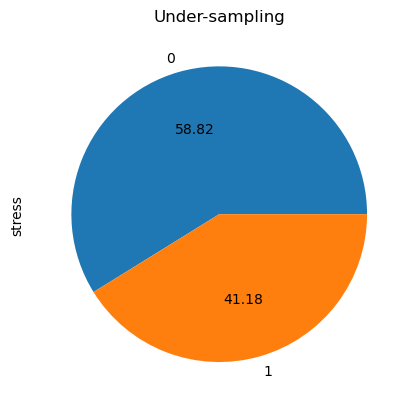

In [7]:
# Balacing data using UnderSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy=0.7) 

X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [8]:
y_res.value_counts()

0    8177
1    5724
Name: stress, dtype: int64

In [9]:
# Split data into train and teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

## Machine Learning - Cold

In [10]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [06:42<00:00, 13.88s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.73,0.71,0.71,0.73,3.87
XGBClassifier,0.72,0.71,0.71,0.72,13.76
RandomForestClassifier,0.73,0.70,0.70,0.72,21.38
SVC,0.71,0.70,0.70,0.71,66.35
NuSVC,0.71,0.69,0.69,0.70,137.49
ExtraTreesClassifier,0.72,0.68,0.68,0.70,6.47
AdaBoostClassifier,0.69,0.67,0.67,0.69,11.10
BernoulliNB,0.64,0.66,0.66,0.65,0.34
BaggingClassifier,0.68,0.65,0.65,0.67,20.17
